In [18]:
import numpy as np
import pandas as pd 

import os
import warnings
warnings.filterwarnings('ignore')

In [19]:
athletes = pd.read_csv('athletes.csv')
events = pd.read_csv('events.csv')
medalists = pd.read_csv('medallists.csv')
medals = pd.read_csv('medals.csv')
medals_total = pd.read_csv('medals_total.csv')
torch_route = pd.read_csv('torch_route.csv')
venues = pd.read_csv('venues.csv')

# ATHLETES ANALYSIS

In [20]:
athletes.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
selected_columns = ['name', 'gender', 'country', 'height', 'weight', 
                    'disciplines', 'events', 'birth_date', 'birth_country']

athletes_selected = athletes[selected_columns]

In [22]:
athletes_cleaned = athletes_selected.dropna(subset=['weight', 'birth_country'])

athletes_cleaned['birth_country'].fillna('Unknown', inplace=True)

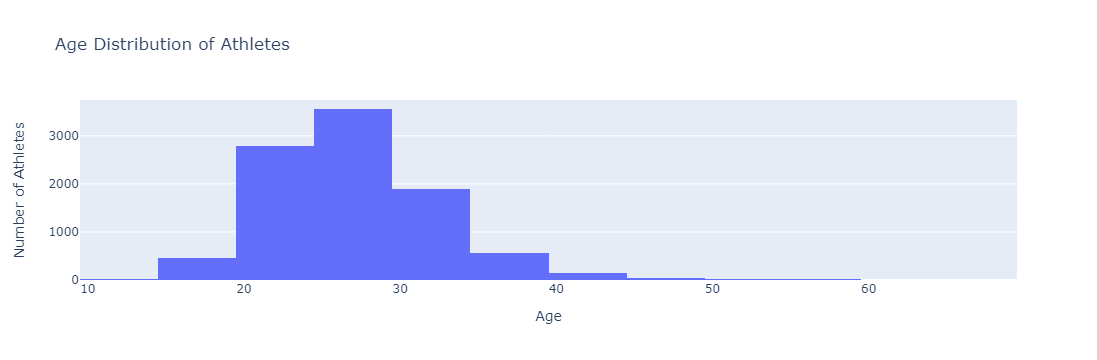

In [23]:
import plotly.express as px

athletes_cleaned['age'] = (pd.to_datetime('today') - pd.to_datetime(athletes_cleaned['birth_date'])).dt.days // 365

fig = px.histogram(athletes_cleaned, x='age', nbins=20, title='Age Distribution of Athletes')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Athletes')
fig.show()

# Gender Distribution of Athletes

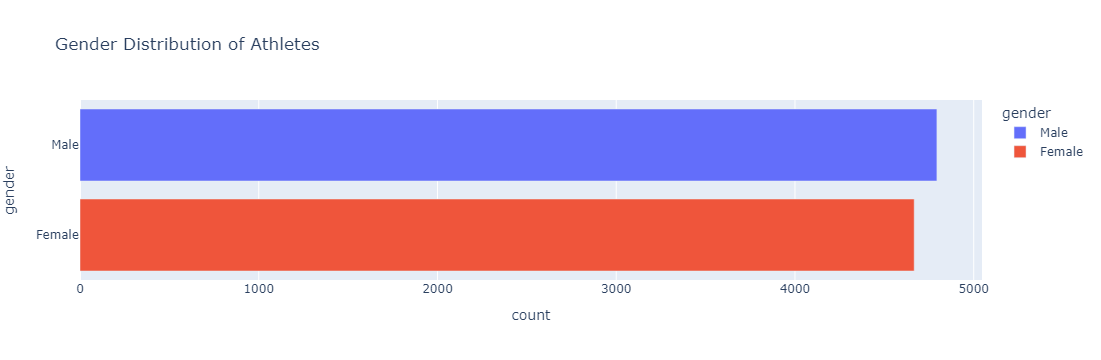

In [24]:
gender_counts = athletes_cleaned['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
fig = px.bar(
    gender_counts,
    x='count',
    y='gender',
    title='Gender Distribution of Athletes',
    color='gender'
)
fig.show()

# Country Representation

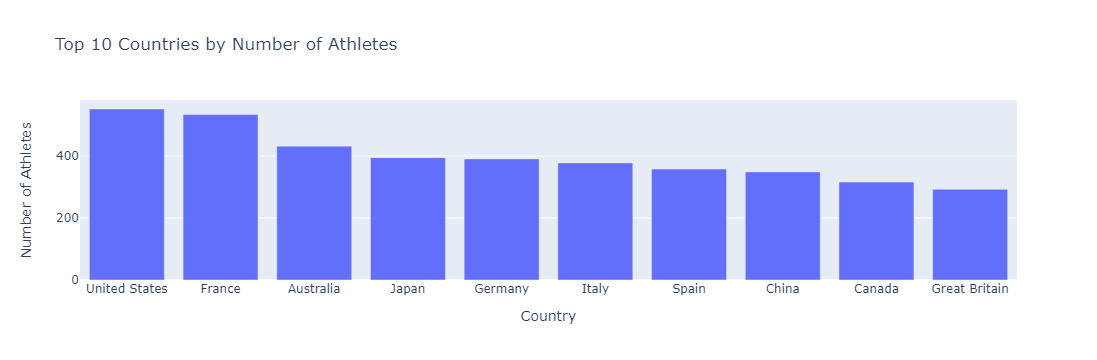

In [25]:
top_countries = athletes_cleaned['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']

fig = px.bar(top_countries, x='country', y='count', title='Top 10 Countries by Number of Athletes')
fig.update_layout(xaxis_title='Country', yaxis_title='Number of Athletes')
fig.show()

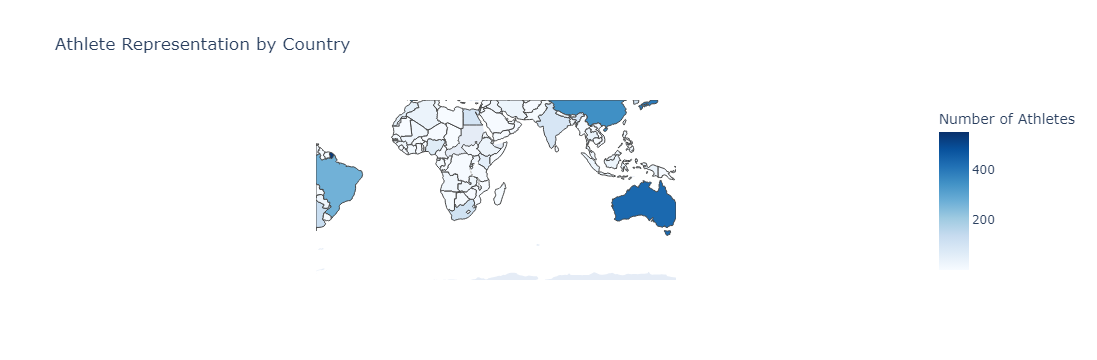

In [50]:
import plotly.graph_objects as go

country_counts = athletes_cleaned['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = go.Figure(data=go.Choropleth(
    locations=country_counts['country'],
    locationmode='country names',
    z=country_counts['count'],
    colorscale='blues',
    colorbar_title="Number of Athletes",
))

fig.update_layout(
    title_text='Athlete Representation by Country',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)
fig.show()

# EVENT ANALYSIS 

In [26]:
unique_events = events['event'].nunique()
print(f'Number of unique events: {unique_events}')

unique_sports = events['sport'].nunique()
print(f'Number of unique sports: {unique_sports}')

Number of unique events: 288
Number of unique sports: 45


In [27]:
events_by_sport = events['sport'].value_counts().reset_index()
events_by_sport.columns = ['Sport', 'Number of Events']
print(events_by_sport)

                    Sport  Number of Events
0               Athletics                48
1                Swimming                35
2               Wrestling                18
3                    Judo                15
4                Shooting                15
5                  Rowing                14
6     Artistic Gymnastics                14
7                  Boxing                13
8                 Fencing                12
9          Cycling Track                 12
10           Canoe Sprint                10
11                Sailing                10
12          Weightlifting                10
13              Taekwondo                 8
14                 Diving                 8
15           Canoe Slalom                 6
16             Equestrian                 6
17           Table Tennis                 5
18                 Tennis                 5
19                Archery                 5
20              Badminton                 5
21          Skateboarding       

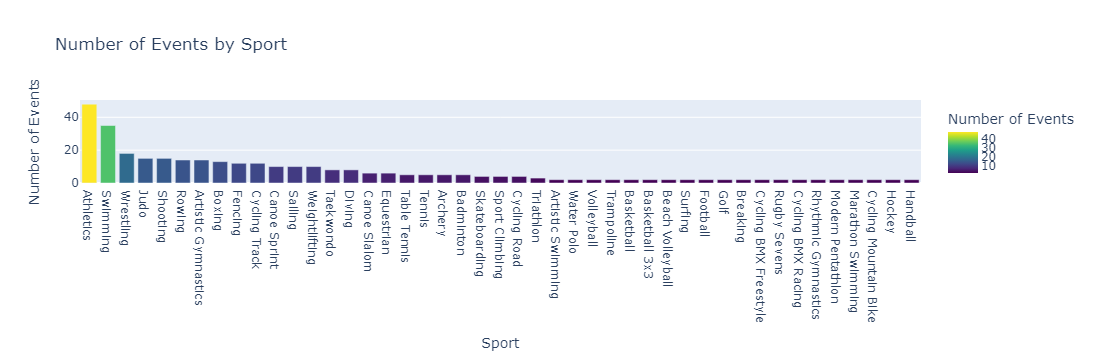

In [28]:
fig = px.bar(events_by_sport,
             x='Sport', y='Number of Events',
             title='Number of Events by Sport',
             color='Number of Events',
             color_continuous_scale='Viridis')  

fig.update_layout(xaxis_title='Sport', yaxis_title='Number of Events')
fig.show()

# MEDALS ANALYSIS 

In [29]:
medals.head()

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


In [30]:
medal_counts = medals['medal_type'].value_counts()
print(medal_counts)

medals_by_country = medals['country_code'].value_counts().reset_index()
medals_by_country.columns = ['Country Code', 'Number of Medals']
print(medals_by_country)

medals_by_gender = medals['gender'].value_counts().reset_index()
medals_by_gender.columns = ['Gender', 'Number of Medals']
print(medals_by_gender)

medal_type
Bronze Medal    381
Silver Medal    327
Gold Medal      326
Name: count, dtype: int64
   Country Code  Number of Medals
0           USA               126
1           CHN                90
2           GBR                64
3           FRA                64
4           AUS                53
..          ...               ...
87          CYP                 1
88          ZAM                 1
89          DMA                 1
90          MGL                 1
91          SVK                 1

[92 rows x 2 columns]
  Gender  Number of Medals
0      M               502
1      W               468
2      X                43
3      O                21


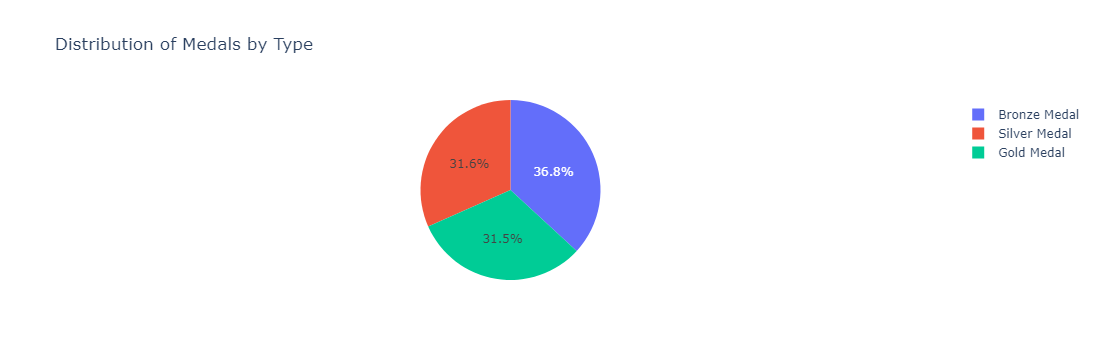

In [31]:
fig = px.pie(medals, names='medal_type', title='Distribution of Medals by Type')

fig.show()

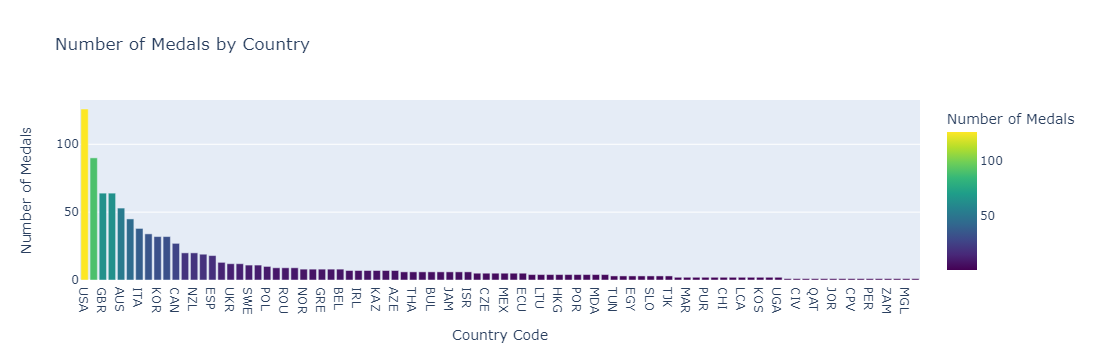

In [32]:
fig = px.bar(medals_by_country,
             x='Country Code', y='Number of Medals',
             title='Number of Medals by Country',
             color='Number of Medals',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Country Code', yaxis_title='Number of Medals')
fig.show()

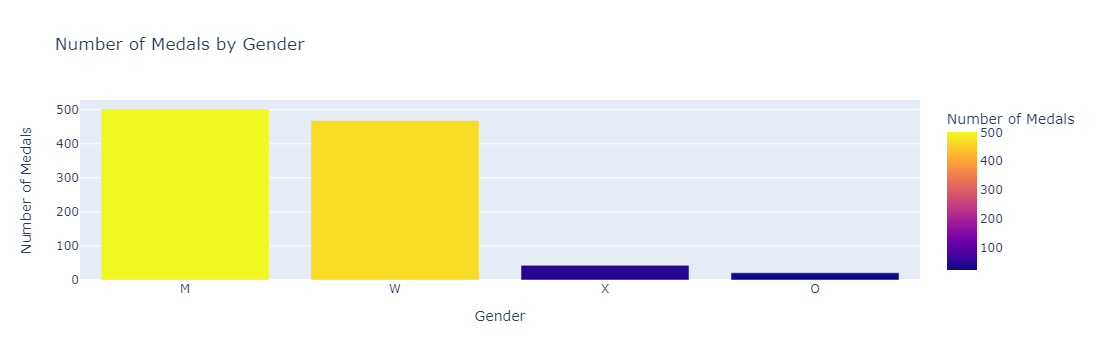

In [33]:
fig = px.bar(medals_by_gender,
             x='Gender', y='Number of Medals',
             title='Number of Medals by Gender',
             color='Number of Medals')  

fig.update_layout(xaxis_title='Gender', yaxis_title='Number of Medals')
fig.show()

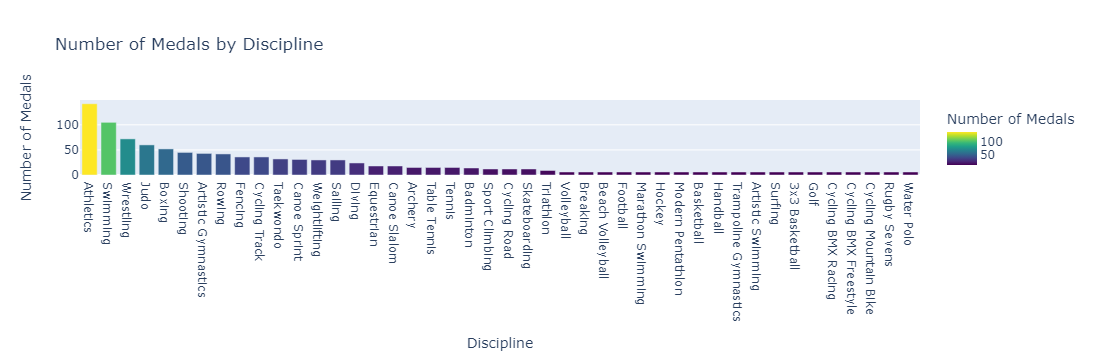

In [34]:
medals_by_discipline = medals['discipline'].value_counts().reset_index()
medals_by_discipline.columns = ['Discipline', 'Number of Medals']

fig = px.bar(medals_by_discipline,
             x='Discipline', y='Number of Medals',
             title='Number of Medals by Discipline',
             color='Number of Medals',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Discipline', yaxis_title='Number of Medals')
fig.show()

In [35]:
print(medals_total.head())
print(medals_total.info())

  country_code  Gold Medal  Silver Medal  Bronze Medal  Total
0          USA          40            44            42    126
1          CHN          39            27            24     90
2          JPN          20            12            13     45
3          AUS          18            19            16     53
4          FRA          16            26            22     64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   Gold Medal    92 non-null     int64 
 2   Silver Medal  92 non-null     int64 
 3   Bronze Medal  92 non-null     int64 
 4   Total         92 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ KB
None


In [36]:
top_countries_total = medals_total.sort_values(by='Total', ascending=False)
print(top_countries_total.head())

  country_code  Gold Medal  Silver Medal  Bronze Medal  Total
0          USA          40            44            42    126
1          CHN          39            27            24     90
4          FRA          16            26            22     64
6          GBR          14            21            29     64
3          AUS          18            19            16     53


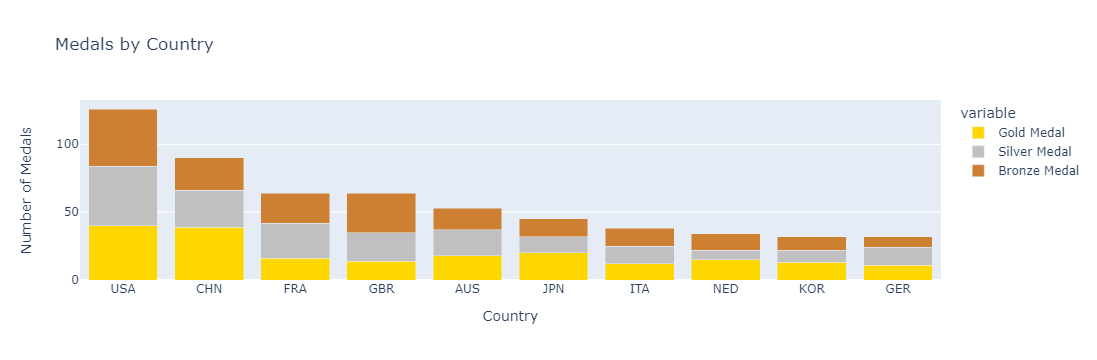

In [37]:
medals_total_sorted = medals_total.head(10)
medals_total_sorted = medals_total_sorted.sort_values(by='Total', ascending=False)

fig = px.bar(medals_total_sorted,
             x='country_code',
             y=['Gold Medal', 'Silver Medal', 'Bronze Medal'],
             title='Medals by Country',
             labels={'value': 'Number of Medals', 'country_code': 'Country'},
             
             color_discrete_map={
                 'Gold Medal': 'gold',# Gold color
                 'Silver Medal': 'silver',#ver color
                 'Bronze Medal': '#cd7f32'  # Bronze color
             }
            )

fig.update_layout(barmode='stack')

fig.show()

In [38]:
medalists.head()

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525


In [39]:
top_medalists = medalists['name'].value_counts().reset_index()
top_medalists.columns = ['Athlete', 'Number of Medals']
print(top_medalists.head(10))

              Athlete  Number of Medals
0         ZHANG Yufei                 6
1         HUSKE Torri                 5
2       MARCHAND Leon                 5
3         SMITH Regan                 5
4      McKEOWN Kaylee                 5
5  O'CALLAGHAN Mollie                 5
6        BILES Simone                 4
7      ANDRADE Rebeca                 4
8      TITMUS Ariarne                 4
9       LEDECKY Katie                 4


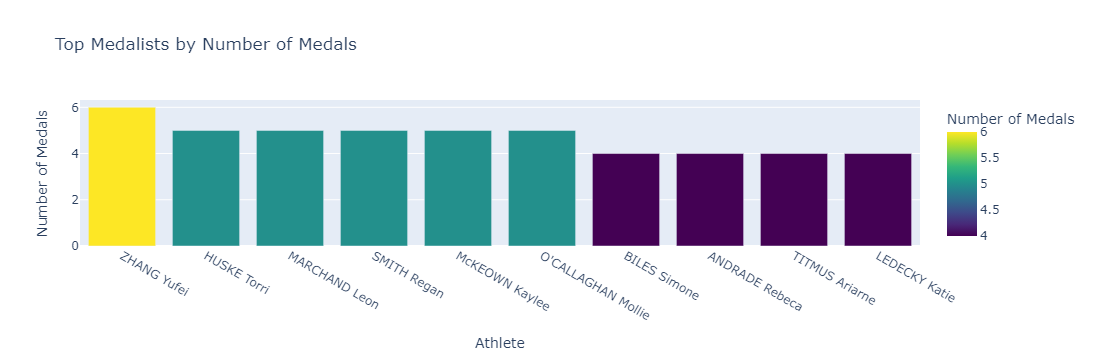

In [40]:
fig = px.bar(top_medalists.head(10),
             x='Athlete', y='Number of Medals',
             title='Top Medalists by Number of Medals',
             color='Number of Medals',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Athlete', yaxis_title='Number of Medals')
fig.show()